In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.hydro import compute_conservatives
from fvhoe.initial_conditions import slotted_disk
from fvhoe.solver import EulerSolver

In [2]:
def px(x, y, z):
    yc = y - 0.5
    return -yc


def py(x, y, z):
    xc = x - 0.5
    return xc


def E(x, y, z):
    xc = x - 0.5
    yc = y - 0.5
    return 1 / (5 / 3 - 1) + 0.5 * (xc**2 + yc**2)


solver = EulerSolver(
    w0=partial(slotted_disk, P=1),
    nx=64,
    ny=64,
    px=3,
    py=3,
    bc=BoundaryCondition(
        x="dirichlet",
        y="x",
        x_value={"rho": 1, "E": E, "px": px, "py": py, "pz": 0},
        y_value="x",
    ),
    riemann_solver="advection_upwind",
    fixed_primitive_variables=["vx", "vy", "P"],
    cupy=True,
)

In [3]:
solver.rkorder(2 * np.pi, downbeats=[0.5 * np.pi, np.pi, 1.5 * np.pi])

100%|██████████| 6.283185307179586/6.283185307179586 [03:29]    


t=6.28, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=6.28, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=6.28, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=6.28, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'


Text(0.5, 0, '$x$')

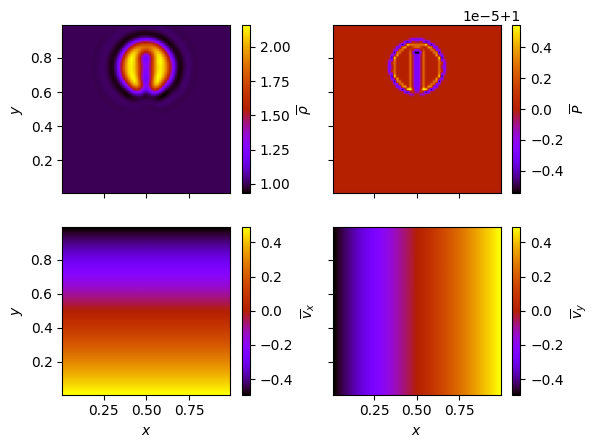

In [6]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

for var, label, idx in zip(
    ["rho", "P", "vx", "vy"],
    [r"$\overline{\rho}$", r"$\overline{P}$", r"$\overline{v}_x$", r"$\overline{v}_y$"],
    [(0, 0), (0, 1), (1, 0), (1, 1)],
):
    im = solver.plot_2d_slice(ax[idx], t=2 * np.pi, param=var, cmap="gnuplot", z=0.5)
    fig.colorbar(im, ax=ax[idx], label=label)

ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")

In [5]:
for t in [0, 1]:
    m_tot = np.sum(solver.snapshots[0]["fv"].rho[:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {t}: {m_tot}")

Total mass at time 0: 0.015625
Total mass at time 1: 0.015625
